In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv

In [2]:
dust=pd.read_csv('C:/Users/Admin/Documents/카카오톡 받은 파일/전체데이터-강화_201901to03_풍향자료.csv',  encoding='CP949')

In [3]:
dust=pd.DataFrame(data=dust)

In [4]:
dust_slice=dust.iloc[0:,[6,7,15,23]] #csv 데이터의 미세먼지 열만 추출

In [5]:
dust_slice_na=dust_slice.replace(0, np.nan) # 0인 값 결측치로, 미세먼지 데이터는 0인 값은 결측치라고 봐도 무방하다
dust_slice_na1=dust_slice_na.fillna(dust_slice_na.mean()) #결측치는 각 열의 평균값으로 대체
dust0=dust_slice_na1

In [6]:
dust0.columns=['date', 'd1', 'd2', 'd3']

In [7]:
dust0.date

0        2019-01-01 0:00
1        2019-01-01 1:00
2        2019-01-01 2:00
3        2019-01-01 3:00
4        2019-01-01 4:00
5        2019-01-01 5:00
6        2019-01-01 6:00
7        2019-01-01 7:00
8        2019-01-01 8:00
9        2019-01-01 9:00
10      2019-01-01 10:00
11      2019-01-01 11:00
12      2019-01-01 12:00
13      2019-01-01 13:00
14      2019-01-01 14:00
15      2019-01-01 15:00
16      2019-01-01 16:00
17      2019-01-01 17:00
18      2019-01-01 18:00
19      2019-01-01 19:00
20      2019-01-01 20:00
21      2019-01-01 21:00
22      2019-01-01 22:00
23      2019-01-01 23:00
24       2019-01-02 0:00
25       2019-01-02 1:00
26       2019-01-02 2:00
27       2019-01-02 3:00
28       2019-01-02 4:00
29       2019-01-02 5:00
              ...       
1842    2019-03-18 18:00
1843    2019-03-18 19:00
1844    2019-03-18 20:00
1845    2019-03-18 21:00
1846    2019-03-18 22:00
1847    2019-03-18 23:00
1848     2019-03-19 0:00
1849     2019-03-19 1:00
1850     2019-03-19 2:00


In [8]:
correl = dust0.corr(method='pearson')
correl

,d1,d2,d3
d1,1.00000,0.759050,0.595620
d2,0.75905,1.000000,0.666216
d3,0.59562,0.666216,1.000000


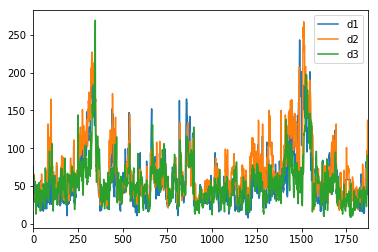

In [9]:
dust0.plot()

In [10]:
dust0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 4 columns):
date    1840 non-null object
d1      1872 non-null float64
d2      1872 non-null float64
d3      1872 non-null float64
dtypes: float64(3), object(1)
memory usage: 58.6+ KB


In [11]:
dust0.head(5)

,date,d1,d2,d3
0,2019-01-01 0:00,76.0,59.0,43.0
1,2019-01-01 1:00,61.0,58.0,41.0
2,2019-01-01 2:00,57.0,44.0,61.0
3,2019-01-01 3:00,60.0,48.0,64.0
4,2019-01-01 4:00,55.0,51.0,51.0


In [12]:
dust0.date= pd.to_datetime(dust0.date)
dust0.set_index('date', inplace=True)
"""
 Make sure to include the 'inplace' argument 
 when you're setting the index of the DataFrame 'dust0 ''
 so that you actually alter the original index and set it to the 'date' column.
"""

"\n Make sure to include the 'inplace' argument \n when you're setting the index of the DataFrame 'dust0 ''\n so that you actually alter the original index and set it to the 'date' column.\n"

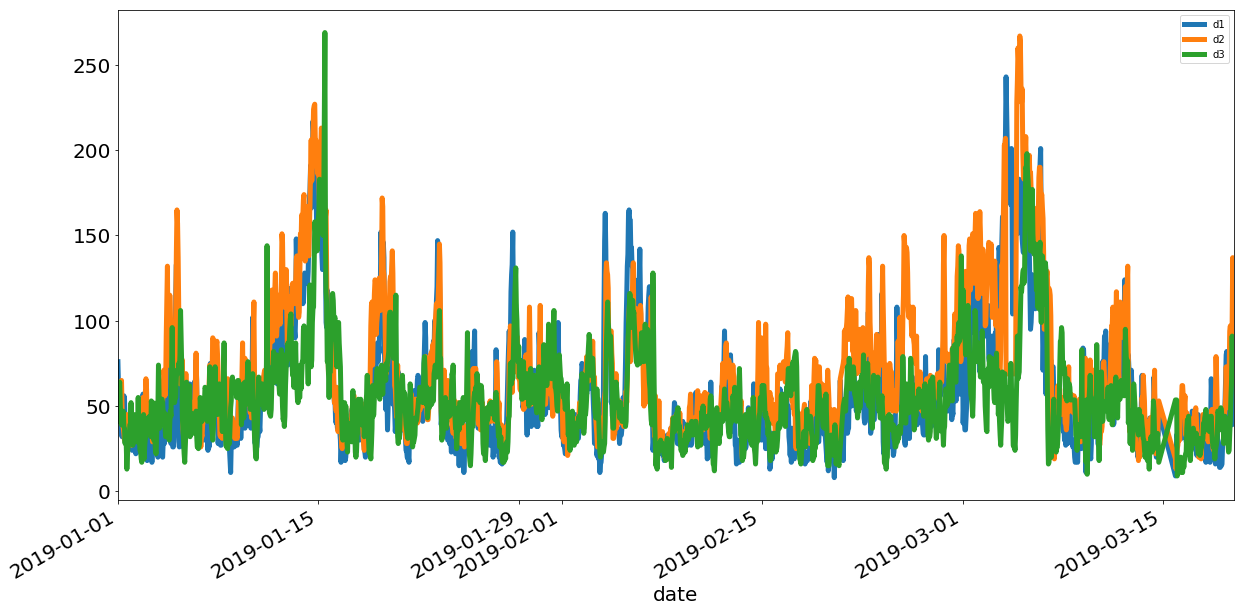

In [13]:
dust0.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('date', fontsize=20);

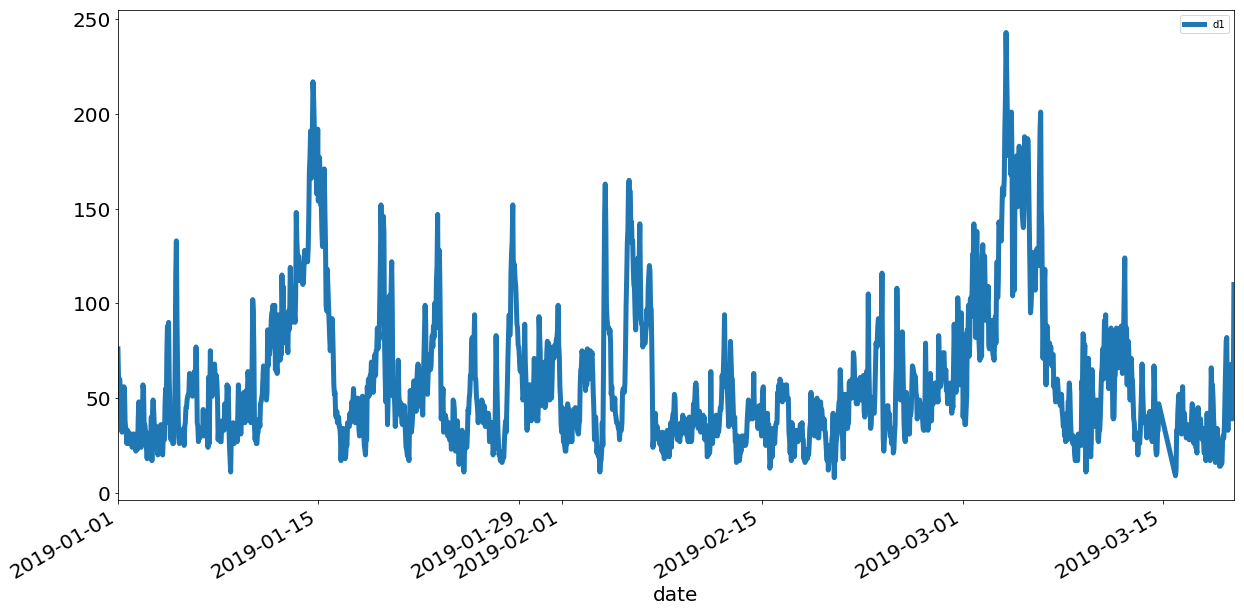

In [14]:
dust0[['d1']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('date', fontsize=20);

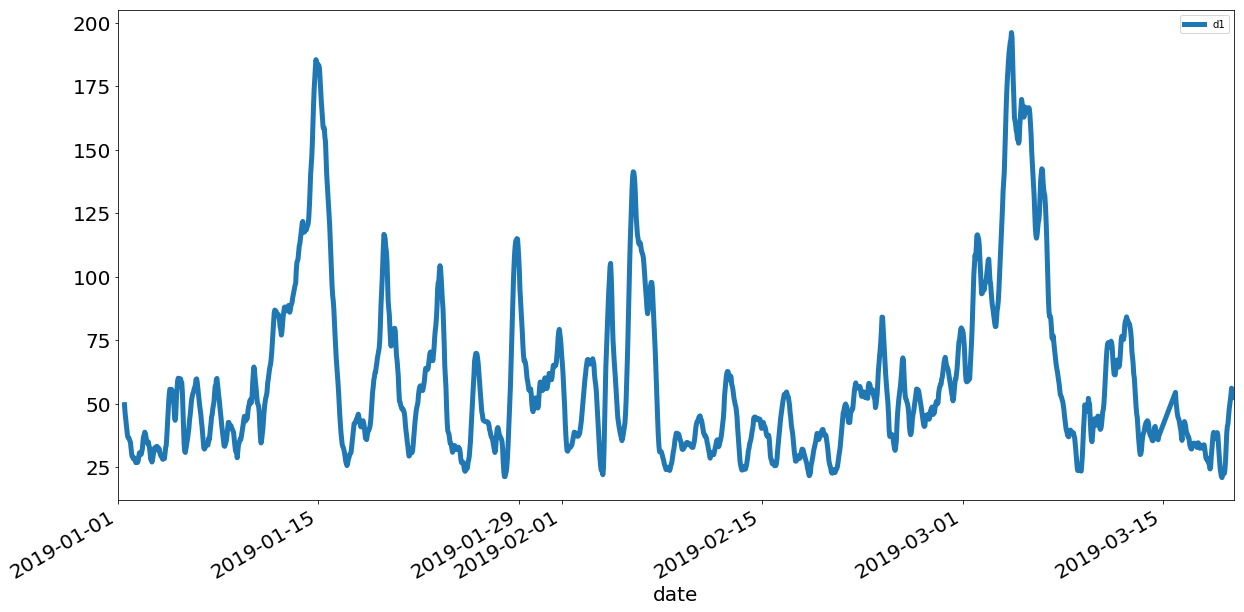

In [15]:
d1 = dust0[['d1']]
d1.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('date', fontsize=20);
#시계열 동향 파악을 위한 rolling average 취하기 => 그래프가 부드러워졌다.
#마코프 체인(이상치를 예측하는 것)
#이 데이터는 smoothing 할 필요 없어보임

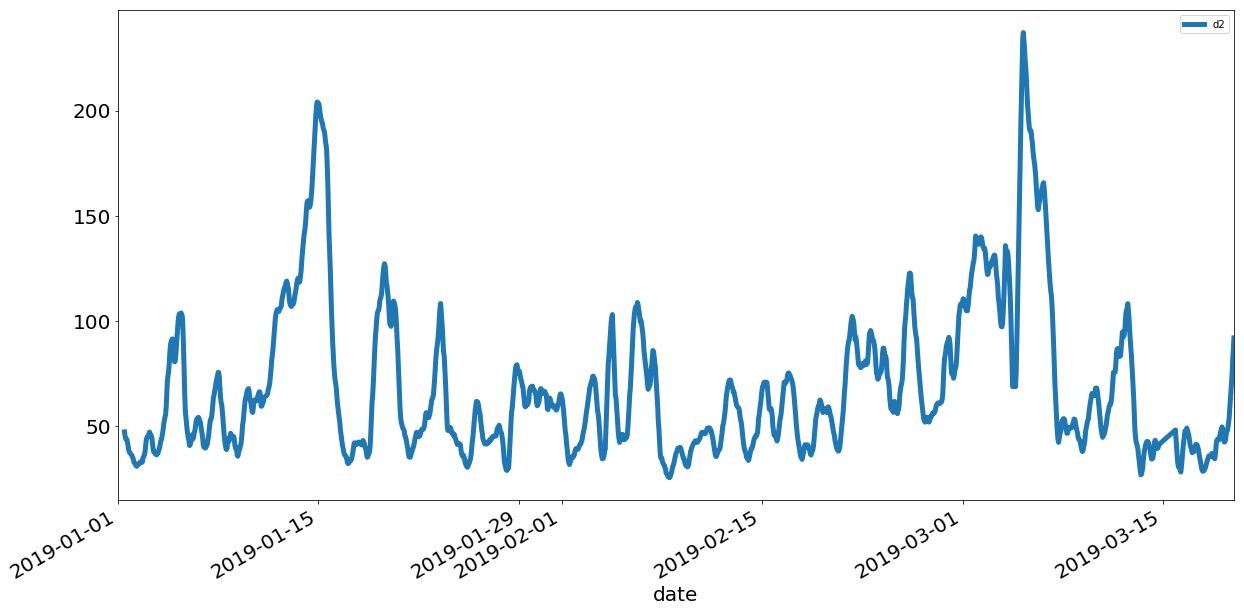

In [16]:
d2= dust0[['d2']]
d2.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('date', fontsize=20);
#d1과 같은 방식으로 seasoning 제거

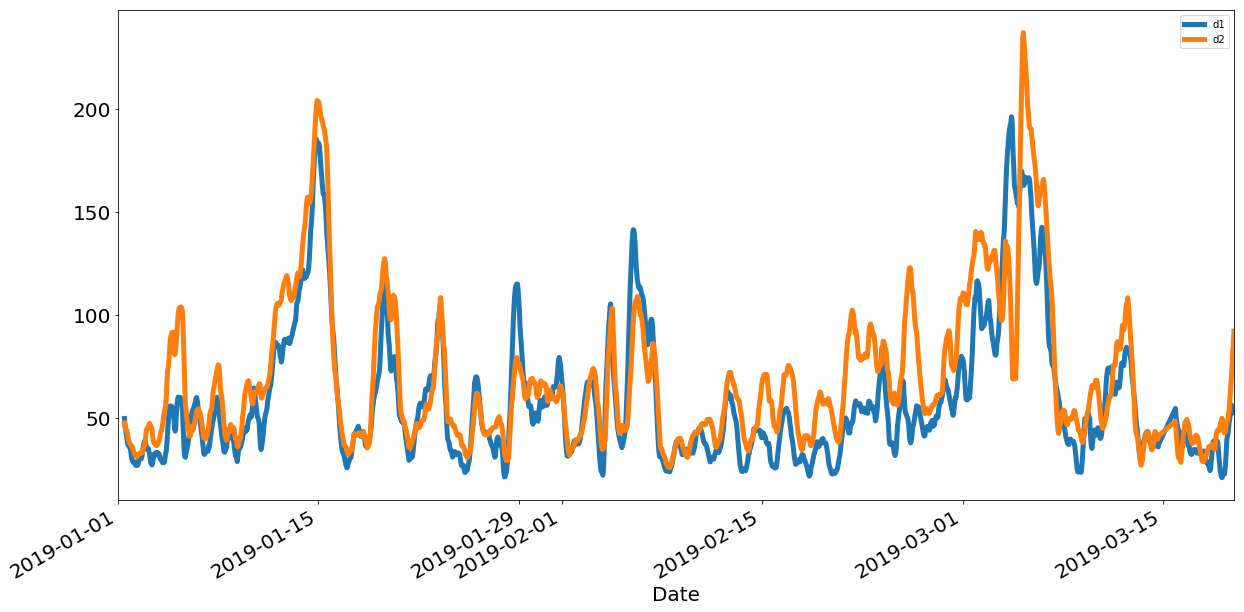

In [17]:
dust0_rm = pd.concat([d1.rolling(12).mean(), d2.rolling(12).mean()], axis=1)
dust0_rm.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);

'\n시계열 데이터의 추세를 없애는 두 가지 방법으로\n1. 롤링 평균\n2. 차분(diff)을 통한 없앰 - 하나의 데이터포인트와 이전 데이터 포인트의 차이만 살펴봄\n'

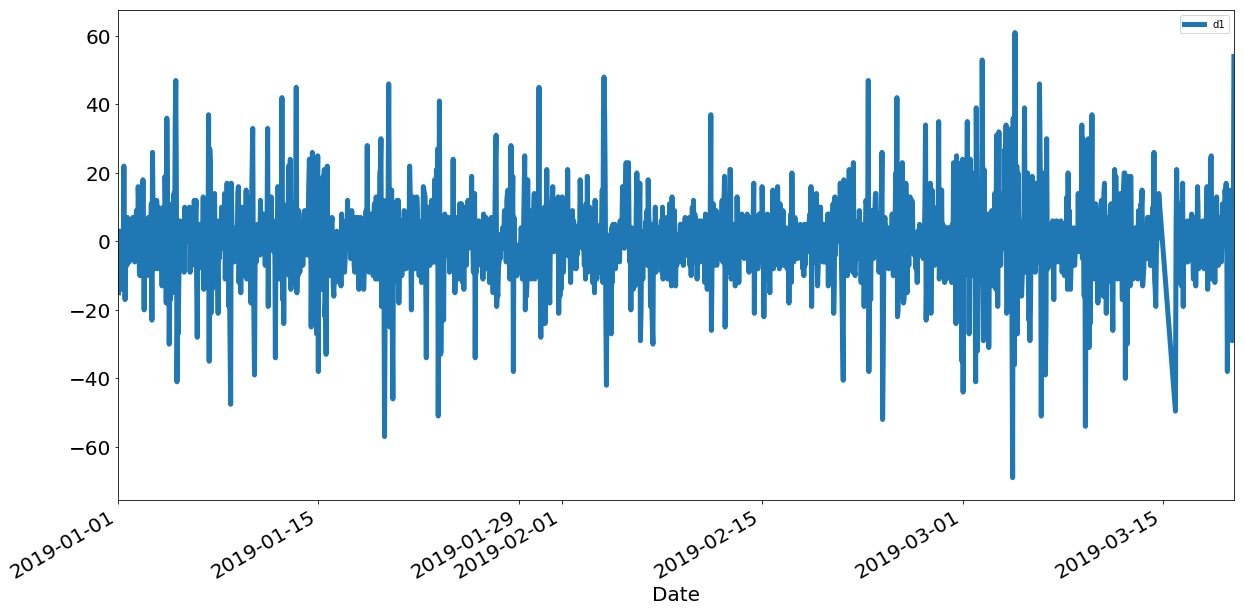

In [18]:
d1.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);
"""
시계열 데이터의 추세를 없애는 두 가지 방법으로
1. 롤링 평균
2. 차분(diff)을 통한 없앰 - 하나의 데이터포인트와 이전 데이터 포인트의 차이만 살펴봄
"""

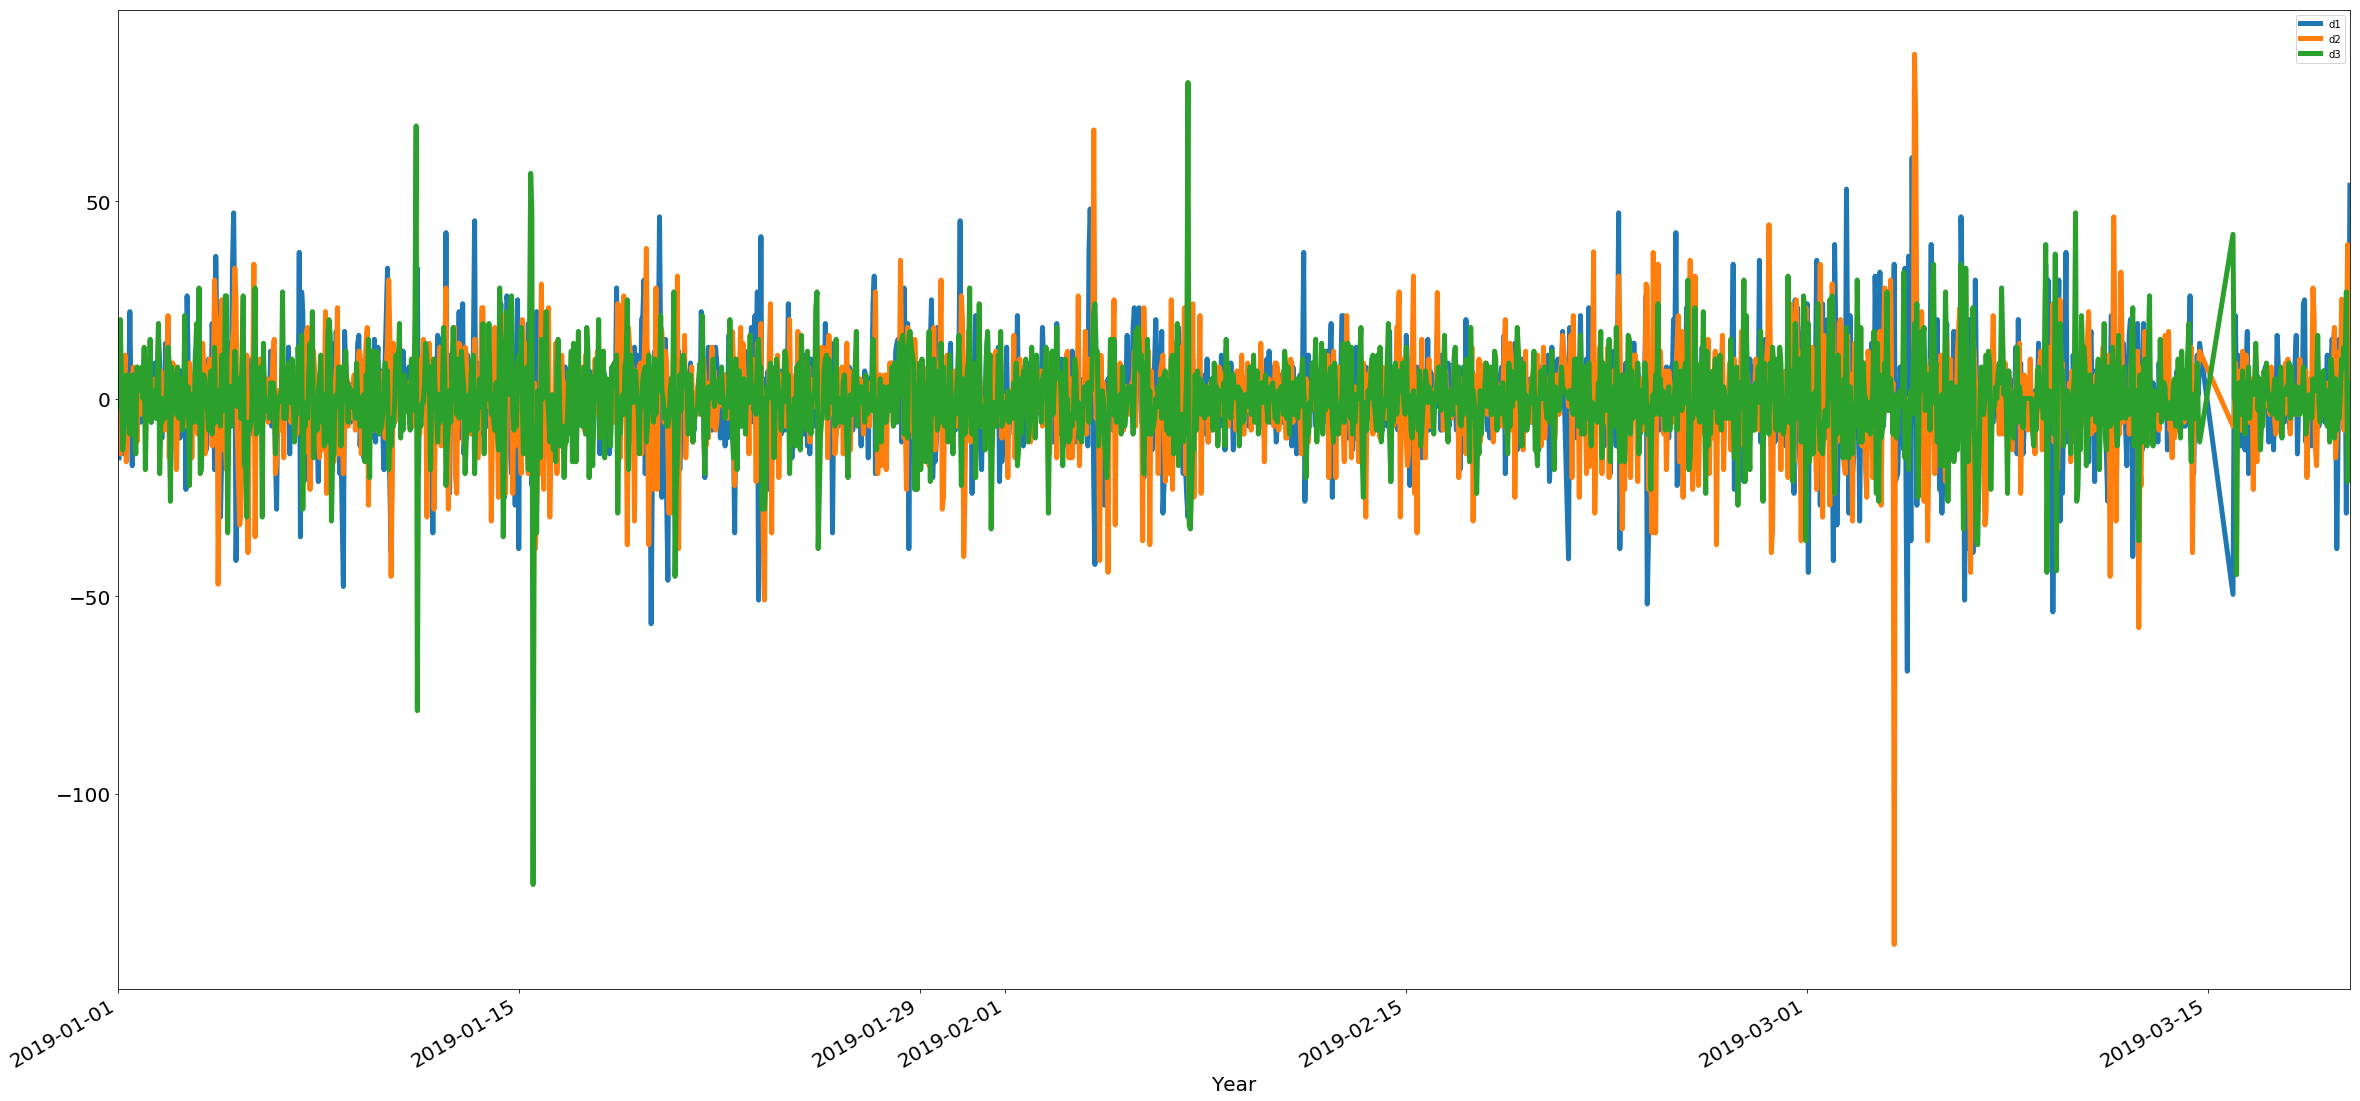

In [19]:
dust0.diff().plot(figsize=(40,20), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [20]:
dust0.corr()

,d1,d2,d3
d1,1.00000,0.759050,0.595620
d2,0.75905,1.000000,0.666216
d3,0.59562,0.666216,1.000000


In [21]:
dust0.diff().corr() #1차 차분(데이터 포인트 한 칸 차이) 한것의 상관관계. 상관관계가 크게 줄어들었다.

,d1,d2,d3
d1,1.000000,0.027781,0.055327
d2,0.027781,1.000000,0.045252
d3,0.055327,0.045252,1.000000


In [22]:
dust0.diff(2).corr()

,d1,d2,d3
d1,1.000000,0.089202,0.110504
d2,0.089202,1.000000,0.091747
d3,0.110504,0.091747,1.000000


In [23]:
dust0.diff(3).corr()

,d1,d2,d3
d1,1.000000,0.157699,0.136818
d2,0.157699,1.000000,0.138757
d3,0.136818,0.138757,1.000000


In [24]:
dust0.diff(120).corr()

,d1,d2,d3
d1,1.000000,0.777495,0.598126
d2,0.777495,1.000000,0.695176
d3,0.598126,0.695176,1.000000


In [25]:
#차분의 사이즈가 상당히 커져야 상관계수가 올라간다. 따라서 미세먼지 데이터는 1시간 단위가 아닌 5분 단위로 데이터를 분석해야 할듯 하다.

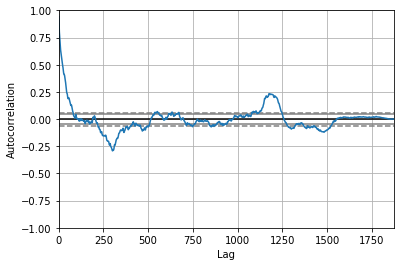

In [26]:
pd.plotting.autocorrelation_plot(d1);
#AR 파라미터는 약 120정도? ( 바깥점선과 안쪽점선에서 안쪽점선으로 선이 들어올 때의 값으로 정한느듯하다)

In [27]:
series = read_csv('C:/Users/Admin/Documents/카카오톡 받은 파일/전체데이터-강화_201901to03_풍향자료.csv',  encoding='CP949')

# fit model
series=series.iloc[0:,[6,7,15,23]]
series=series.replace(0, np.nan) # 0인 값 결측치로, 미세먼지 데이터는 0인 값은 결측치라고 봐도 무방하다
series=series.fillna(series.mean())
series.columns=['date', 'd1', 'd2', 'd3']
#결측치는 각 열의 평균값으로 대체
series1=series.iloc[0:,[1]]

In [28]:
series1.head(5)

,d1
0,76.0
1,61.0
2,57.0
3,60.0
4,55.0


In [29]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series1, order=(1,1,0))


predicted=71.968898, expected=63.000000
predicted=62.863616, expected=53.000000
predicted=52.836078, expected=51.000000
predicted=50.950603, expected=47.000000
predicted=46.917918, expected=52.000000
predicted=52.053627, expected=47.000000
predicted=46.904681, expected=53.000000
predicted=53.066928, expected=51.000000
predicted=50.951688, expected=60.000000
predicted=60.113477, expected=58.000000
predicted=57.957731, expected=61.000000
predicted=61.029580, expected=49.000000
predicted=48.814640, expected=52.000000
predicted=52.021086, expected=54.000000
predicted=54.009343, expected=57.000000
predicted=57.025292, expected=62.000000
predicted=62.056703, expected=43.000000
predicted=42.727143, expected=40.000000
predicted=39.931553, expected=41.000000
predicted=40.985562, expected=53.000000
predicted=53.142101, expected=64.000000
predicted=64.146377, expected=52.000000
predicted=51.820863, expected=58.000000
predicted=58.062995, expected=105.000000
predicted=105.710657, expected=67.00000

predicted=137.912343, expected=106.000000
predicted=106.355076, expected=93.000000
predicted=93.119782, expected=84.000000
predicted=84.074954, expected=77.000000
predicted=77.052433, expected=70.000000
predicted=70.045812, expected=72.000000
predicted=71.982888, expected=81.000000
predicted=80.939553, expected=72.000000
predicted=72.064907, expected=125.000000
predicted=124.509862, expected=131.000000
predicted=130.989121, expected=102.000000
predicted=102.280660, expected=123.000000
predicted=122.780862, expected=125.000000
predicted=125.010695, expected=106.000000
predicted=106.248157, expected=91.000000
predicted=91.168595, expected=95.000000
predicted=94.970032, expected=97.000000
predicted=96.993110, expected=101.000000
predicted=100.974478, expected=109.000000
predicted=108.938291, expected=78.000000
predicted=78.366905, expected=76.000000
predicted=76.022970, expected=81.000000
predicted=80.946181, expected=86.000000
predicted=85.950248, expected=82.000000
predicted=82.050072, 

predicted=26.985607, expected=33.000000
predicted=32.879036, expected=33.000000
predicted=32.973612, expected=40.000000
predicted=39.867640, expected=51.000000
predicted=50.814746, expected=63.000000
predicted=62.812893, expected=66.000000
predicted=65.949620, expected=76.000000
predicted=75.853418, expected=60.000000
predicted=60.234836, expected=74.000000
predicted=73.773068, expected=91.000000
predicted=90.750879, expected=87.000000
predicted=87.068681, expected=94.000000
predicted=93.902288, expected=73.000000
predicted=73.336764, expected=77.000000
predicted=76.935111, expected=65.000000
predicted=65.192557, expected=62.000000
predicted=62.040918, expected=55.000000
predicted=55.101864, expected=62.000000
predicted=61.875716, expected=66.000000
predicted=65.928275, expected=76.000000
predicted=75.837265, expected=87.000000
predicted=86.832396, expected=82.000000
predicted=82.084120, expected=66.000000
predicted=66.246122, expected=40.000000
predicted=40.346037, expected=39.000000


C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=28.985811, expected=35.000000
predicted=34.909467, expected=50.000000
predicted=49.820105, expected=63.000000
predicted=62.858465, expected=80.000000
predicted=79.839807, expected=82.000000
predicted=81.984491, expected=44.000000
predicted=44.351067, expected=33.000000
predicted=33.066609, expected=48.000000
predicted=47.853683, expected=51.000000
predicted=50.960789, expected=50.000000
predicted=49.994595, expected=51.000000
predicted=50.977951, expected=53.000000
predicted=52.970470, expected=68.000000
predicted=67.868539, expected=39.000000
predicted=39.270373, expected=53.000000
predicted=52.827866, expected=56.000000
predicted=55.955504, expected=110.000000
Test MSE: 201.916


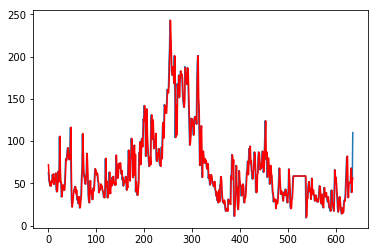

'\nAR(1,1,0)-mse 201.9\nAR\n'

In [30]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 

X = series1.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
count=0
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	if count%100==0:
		print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

"""
AR(1,1,0)-mse 201.9
AR
"""

                             ARIMA Model Results                              
Dep. Variable:                   D.d1   No. Observations:                 1871
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -7363.755
Method:                       css-mle   S.D. of innovations             12.389
Date:                Wed, 27 Mar 2019   AIC                          14733.510
Time:                        14:36:19   BIC                          14750.113
Sample:                             1   HQIC                         14739.627
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0180      0.283      0.063      0.949      -0.537       0.573
ar.L1.D.d1    -0.0107      0.023     -0.460      0.646      -0.056       0.035
                                    Roots           

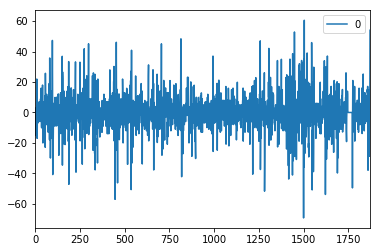

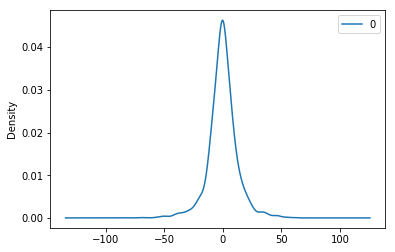

                 0
count  1871.000000
mean     -0.000091
std      12.392124
min     -69.317159
25%      -6.007470
50%      -0.028828
75%       5.939135
max      60.597409


In [47]:
from pandas import DataFrame
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=71.505096, expected=63.000000
predicted=61.290803, expected=53.000000
predicted=52.398435, expected=51.000000
predicted=51.892902, expected=47.000000
predicted=48.412084, expected=52.000000
predicted=53.000320, expected=47.000000
predicted=47.379408, expected=53.000000
predicted=52.988906, expected=51.000000
predicted=51.005452, expected=60.000000
predicted=59.743292, expected=58.000000
predicted=57.605304, expected=61.000000
predicted=60.267028, expected=49.000000
predicted=48.565830, expected=52.000000
predicted=52.101179, expected=54.000000
predicted=54.858316, expected=57.000000
predicted=57.207685, expected=62.000000
predicted=61.776930, expected=43.000000
predicted=42.278396, expected=40.000000
predicted=40.003683, expected=41.000000
predicted=42.514948, expected=53.000000
predicted=54.169089, expected=64.000000
predicted=63.965115, expected=52.000000
predicted=50.388272, expected=58.000000
predicted=56.805904, expected=105.000000
predicted=105.472856, expected=67.00000

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=51.920981, expected=78.000000
predicted=79.641994, expected=80.000000
predicted=81.111402, expected=103.000000
predicted=102.213655, expected=95.000000
predicted=92.497771, expected=79.000000
predicted=76.635146, expected=57.000000
predicted=56.980554, expected=72.000000
predicted=74.697517, expected=91.000000
predicted=93.604563, expected=95.000000
predicted=94.359440, expected=60.000000
predicted=57.357881, expected=84.000000
predicted=83.913221, expected=40.000000
predicted=42.107370, expected=52.000000
predicted=53.817927, expected=42.000000
predicted=45.473117, expected=36.000000
predicted=37.725333, expected=36.000000
predicted=37.525111, expected=44.000000
predicted=44.825875, expected=51.000000
predicted=51.147278, expected=86.000000
predicted=84.511037, expected=81.000000
predicted=78.191968, expected=99.000000
predicted=94.690727, expected=72.000000
predicted=69.675225, expected=78.000000
predicted=76.461417, expected=102.000000
predicted=103.033841, expected=103.00

predicted=17.599485, expected=18.000000
predicted=18.771933, expected=20.000000
predicted=20.791295, expected=20.000000
predicted=20.284320, expected=17.000000
predicted=16.931816, expected=31.000000
predicted=30.635237, expected=31.000000
predicted=29.863747, expected=28.000000
predicted=27.384825, expected=28.000000
predicted=27.058484, expected=26.000000
predicted=25.634779, expected=25.000000
predicted=25.440644, expected=59.000000
predicted=58.438622, expected=54.000000
predicted=51.394747, expected=84.000000
predicted=81.498099, expected=83.000000
predicted=77.759915, expected=67.000000
predicted=64.587794, expected=78.000000
predicted=76.472466, expected=24.000000
predicted=24.695114, expected=11.000000
predicted=16.700687, expected=24.000000
predicted=27.646845, expected=29.000000
predicted=33.589540, expected=41.000000
predicted=42.875826, expected=71.000000
predicted=68.103538, expected=40.000000
predicted=36.497274, expected=46.000000
predicted=44.990404, expected=22.000000


predicted=44.210313, expected=37.000000
predicted=35.727666, expected=34.000000
predicted=32.473829, expected=36.000000
predicted=35.002744, expected=39.000000
predicted=39.445742, expected=33.000000
predicted=33.519060, expected=32.000000
predicted=32.232251, expected=28.000000
predicted=28.173802, expected=34.000000
predicted=34.741937, expected=29.000000
predicted=29.323707, expected=21.000000
predicted=21.744426, expected=21.000000
predicted=21.534397, expected=21.000000
predicted=21.821025, expected=17.000000
predicted=18.274385, expected=26.000000
predicted=26.426696, expected=42.000000
predicted=40.954815, expected=28.000000
predicted=26.836450, expected=26.000000
predicted=25.269590, expected=23.000000
predicted=21.933768, expected=20.000000
predicted=21.278730, expected=17.000000
predicted=18.499978, expected=41.000000
predicted=41.106724, expected=66.000000
predicted=63.801335, expected=55.000000
predicted=51.862771, expected=57.000000
predicted=53.448989, expected=50.000000


C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=49.659700, expected=53.000000
predicted=51.753905, expected=68.000000
predicted=67.273962, expected=39.000000
predicted=38.265277, expected=53.000000
predicted=53.790688, expected=56.000000
predicted=54.883070, expected=110.000000
Test MSE: 194.391


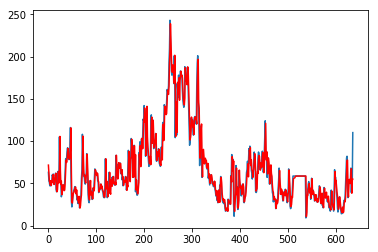

In [48]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X = series1.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
"""
독립변수 1개 -
시차는 데이터포인트 2(2시간 시차)
    강화-(둘사이 거리측정)-서울
속도
if t2시점에서 연관이 많다면
-> 
강화  서울 서울
t-2  t-1   t-1
"""